In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#imports and paths
import numpy as np 
import pickle 
import matplotlib.pyplot as plt
from src import plotting
path= 'data/jaw_images.pkl'

%matplotlib inline

In [3]:
data = pickle.load(open(path,'rb'))

In [4]:
for name, image in data.items():
    print(name,end=', ')

ctsk inj 21, ctsk inj 23, ctsk inj 4, ctsk inj1, ctsk inj10, ctsk inj12, ctsk inj13, ctsk inj14, ctsk inj15, ctsk inj16, ctsk inj17, ctsk inj18, ctsk inj19, ctsk inj2, ctsk inj20, ctsk inj22, ctsk inj25, ctsk inj26, ctsk inj3, ctsk inj4, ctsk inj5, ctsk inj6, ctsk inj7, ctsk inj8, ctsk inj9, ctsk ink 24, matrilinA_inj1, matrilinA_inj10, matrilinA_inj11, matrilinA_inj12, matrilinA_inj13, matrilinA_inj14, matrilinA_inj15, matrilinA_inj16, matrilinA_inj17, matrilinA_inj18, matrilinA_inj2, matrilinA_inj21, matrilinA_inj22, matrilinA_inj23, matrilinA_inj24, matrilinA_inj3, matrilinA_inj4, matrilinA_inj5, matrilinA_inj6, plecA_inj1, plecA_inj10, plecA_inj11, plecA_inj12, plecA_inj13, plecA_inj15, plecA_inj16, plecA_inj17, plecA_inj18, plecA_inj19, plecA_inj20, plecA_inj22, plecA_inj3, plecA_inj4, plecA_inj5, plecA_inj6, plecA_inj7, plecA_inj9, vdrA_inj1, vdrA_inj2, vdrA_inj3, vdrA_inj4, vdrA_inj5, vdrA_inj6, vdrA_inj7, wt_1, wt_10, wt_12, wt_13, wt_14, wt_15, wt_16, wt_17, wt_18, wt_19, wt_2

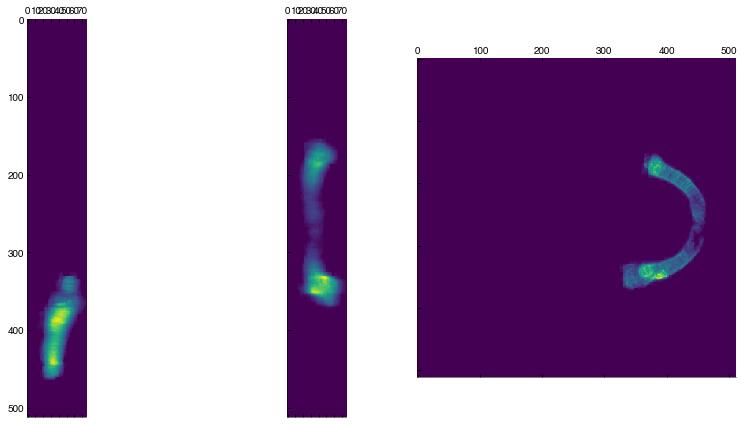

In [5]:
#exploratory example

plotting.trisum(data['vdrA_inj2']);



In [6]:
D = data['vdrA_inj2']

In [7]:
D.shape

(512, 512, 76)

In [8]:
from scipy import ndimage

In [9]:
B = ndimage.gaussian_filter(D, 10)

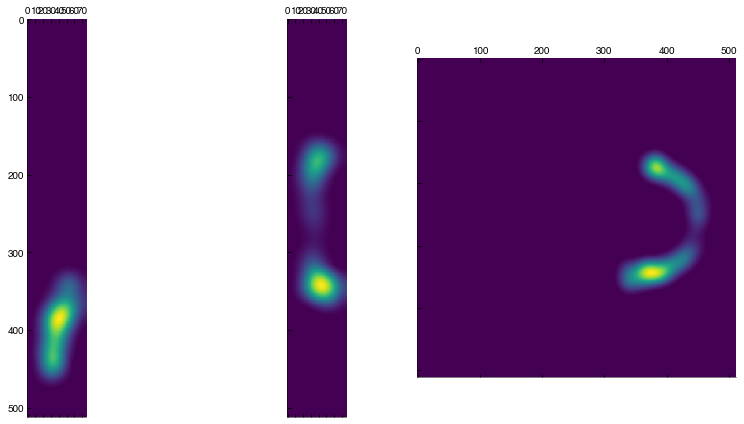

In [11]:
plotting.trisum(B)

In [12]:
E = ndimage.distance_transform_cdt(B)>5

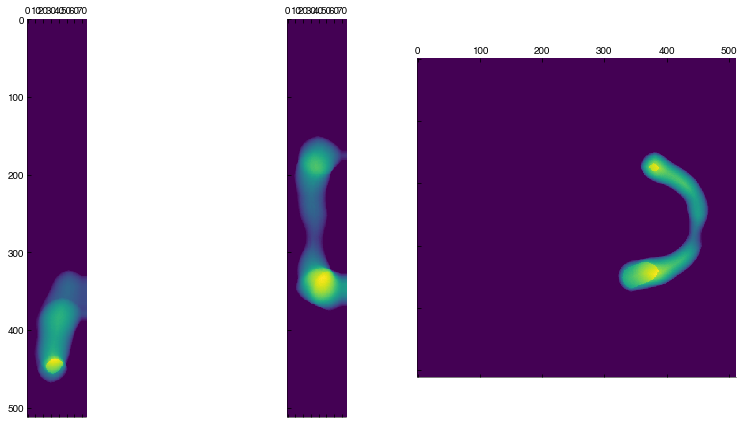

In [13]:
plotting.trisum(E)

In [18]:
r_in = np.array(E.nonzero()).T

In [19]:
r = np.array(D.nonzero()).T

In [20]:
r.shape

(260944, 3)

In [21]:
r_in.shape

(375823, 3)

In [22]:
from scipy.spatial import cKDTree

In [23]:
# random selection of points
N = 1000
np.random.shuffle(r_in)
r_sel = r_in[:N]

In [24]:
r_sel

array([[336, 365,  66],
       [339, 377,  41],
       [161, 385,  54],
       ...,
       [211, 452,  38],
       [169, 398,  36],
       [182, 370,  45]])

In [25]:
tree_in = cKDTree(r_sel)
tree = cKDTree(r)

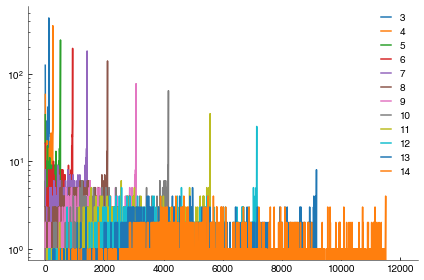

In [26]:
sizes = np.arange(3,15)
counts = []
empty = []
bins = np.arange(0,12000,5)
for rcut in sizes:
    ngh = tree_in.query_ball_tree(tree, rcut)
    num = [len(nlist) for nlist in ngh]
    counts.append(sum(num))
    H,e = np.histogram(num, bins=bins)
    empty.append(H[0])
    plt.plot(bins[:-1], H, label = str(rcut))
plt.legend(), plt.yscale('log');

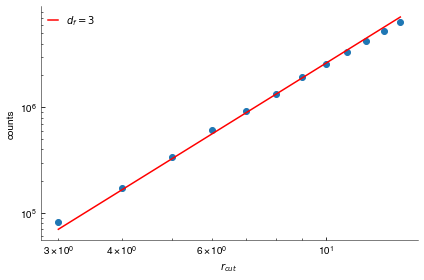

In [33]:
plt.scatter(sizes,counts)
plt.plot(sizes, 2600*sizes**3,'r', label="$d_f=3$")
plt.yscale('log'),plt.xscale('log'), plt.legend(), plt.xlabel("$r_{cut}$"), plt.ylabel("counts");

amplitude 2151.92 rate 1.26 exponent 0.79 


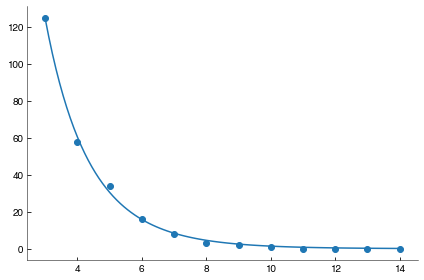

In [30]:
from scipy.optimize import curve_fit

def model(x,a,b,c):
    return a*np.exp(-(b*x)**c)
empty = np.array(empty)
plt.scatter(sizes,empty);
popt,pcov = curve_fit(model, sizes,empty, p0=[500,1,1])
s = np.linspace(sizes.min(), sizes.max(),100)
plt.plot(s, model(s,*popt))
print("amplitude {:.2f} rate {:.2f} exponent {:.2f} ".format(*popt))

In [ ]:
A*exp(-(r/s)**beta)

In [14]:
from copy import deepcopy

In [93]:
DD = deepcopy(~(D>0))
DD[B==0]=0
DD[D>0]=0
# DD[D==0]=0

F = ndimage.distance_transform_cdt(DD)

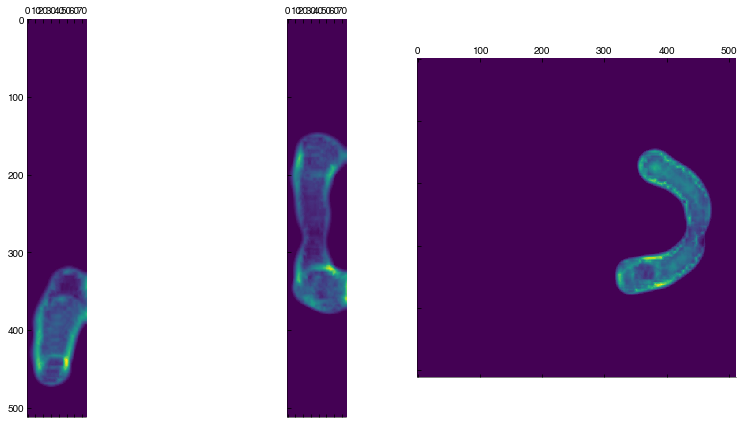

In [95]:
plotting.trisum(F)
# plt.colorbar()

In [96]:
F[F>0].mean()

2.212809613306592

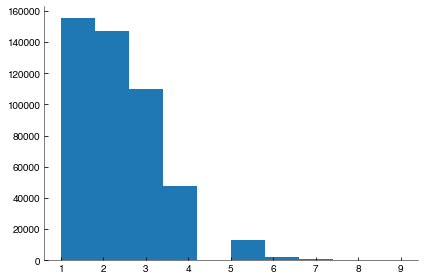

In [99]:
plt.hist(F[F>0]);